In [83]:
#1b
import numpy as np
def simulate_markov_chain(initial_state, transition_matrix, steps):
    current_state = initial_state
    chain = [current_state]

    for _ in range(steps - 1):
        probabilities = transition_matrix[current_state - 1]
        next_state = np.random.choice(np.arange(1, len(probabilities) + 1), p=probabilities)
        chain.append(next_state)
        current_state = next_state

    return chain

# Given transition matrix
transition_matrix = np.array([[0.2, 0.7, 0.1],
                              [0.2, 0.5, 0.3],
                              [0.2, 0.4, 0.4]])
# Initial state
initial_state = 1
# Number of steps to simulate
num_steps = 100

# Simulate the Markov chain
simulation_result = simulate_markov_chain(initial_state, transition_matrix, num_steps)
print("Simulated Markov Chain:", simulation_result)

Simulated Markov Chain: [1, 3, 1, 2, 1, 2, 1, 2, 2, 1, 2, 3, 2, 3, 3, 2, 1, 1, 2, 1, 1, 2, 3, 3, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 1, 1, 1, 2, 3, 2, 2, 2, 3, 1, 1, 2, 1, 2, 1, 2, 3, 2, 2, 3, 3, 3, 2, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 2, 3, 1, 2, 2, 1, 3, 1, 2, 3, 3, 1]


In [4]:
#2a
import numpy as np
from scipy.linalg import null_space

# Given transition matrix
P = np.array([[0.2, 0.7, 0.1],
              [0.2, 0.5, 0.3],
              [0.2, 0.4, 0.4]])

# Transpose of the transition matrix
PT = P.T

# Solve the linear system (PT - I) * pi_infinity = 0
A = PT - np.eye(len(P))
pi_infinity = null_space(A)

# Normalize the stationary distribution
pi_infinity /= np.sum(pi_infinity) if np.sum(pi_infinity) != 0 else 1

print("Stationary Distribution (π∞):", list(pi_infinity.flatten()))

Stationary Distribution (π∞): [0.20000000000000004, 0.5111111111111112, 0.2888888888888888]


In [5]:
#2a
#showing the stationary distribution is the same when we do Stationary dist*P or stationary dist*P^10
import numpy as np
from scipy.linalg import null_space

# Verify that pi_infinity * P = pi_infinity
result_1 = np.dot(pi_infinity.flatten(), P)
print("pi_infinity * P:", result_1)

# Verify that pi_infinity * P^10 = pi_infinity
result_2 = np.dot(pi_infinity.flatten(), np.linalg.matrix_power(P, 10))
print("pi_infinity * P^10:", result_2)


pi_infinity * P: [0.2        0.51111111 0.28888889]
pi_infinity * P^10: [0.2        0.51111111 0.28888889]


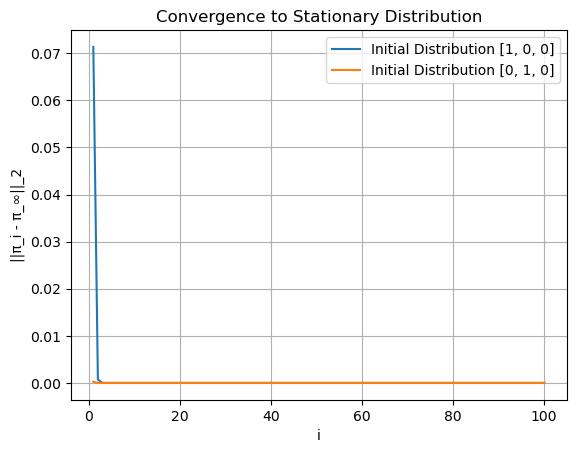

In [7]:
#2b
import matplotlib.pyplot as plt
#Function to calculate the probability distribution at time i
def calculate_distribution(pi_0, P, i):
    result = np.dot(pi_0, np.linalg.matrix_power(P, i))
    return result

# Plotting
# Choose two different initial conditions pi_0
pi_0_1 = np.array([1, 0, 0])  # Initial Distribution 1
pi_0_2 = np.array([0, 1, 0])  # Initial Distribution 2

# Initialize lists to store results for plotting
i_values = []
l2_norm_values_1 = []
l2_norm_values_2 = []

for i in range(1, 101):  # Assuming up to 100 iterations
    # Calculate probability distributions at time i
    pi_i_1 = calculate_distribution(pi_0_1, P, i)
    pi_i_2 = calculate_distribution(pi_0_2, P, i)

    # Calculate L2 norms
    l2_norm_1 = np.linalg.norm(pi_i_1 - pi_infinity.flatten())**2
    l2_norm_2 = np.linalg.norm(pi_i_2 - pi_infinity.flatten())**2

    # Append values to lists
    i_values.append(i)
    l2_norm_values_1.append(l2_norm_1)
    l2_norm_values_2.append(l2_norm_2)

# Plot for each initial condition
plt.plot(i_values, l2_norm_values_1, label='Initial Distribution [1, 0, 0]')
plt.plot(i_values, l2_norm_values_2, label='Initial Distribution [0, 1, 0]')

# Plot settings
plt.xlabel('i')
plt.ylabel('||π_i - π_∞||_2 (log scale)')
plt.title('Convergence to Stationary Distribution')
plt.legend()
plt.yscale('log')  # Set y-axis to log scale
plt.grid()
plt.show()

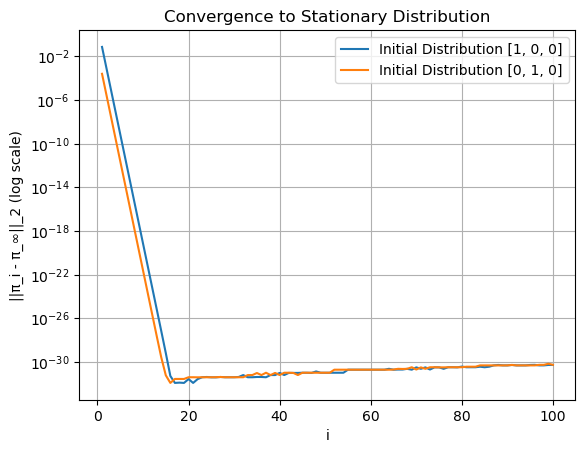

In [9]:
# Plot for each initial condition
plt.plot(i_values, l2_norm_values_1, label='Initial Distribution [1, 0, 0]')
plt.plot(i_values, l2_norm_values_2, label='Initial Distribution [0, 1, 0]')

# Plot settings
plt.xlabel('i')
plt.ylabel('||π_i - π_∞||_2 (log scale)')
plt.title('Convergence to Stationary Distribution')
plt.legend()
plt.yscale('log')  # Set y-axis to log scale
plt.grid()
plt.show()

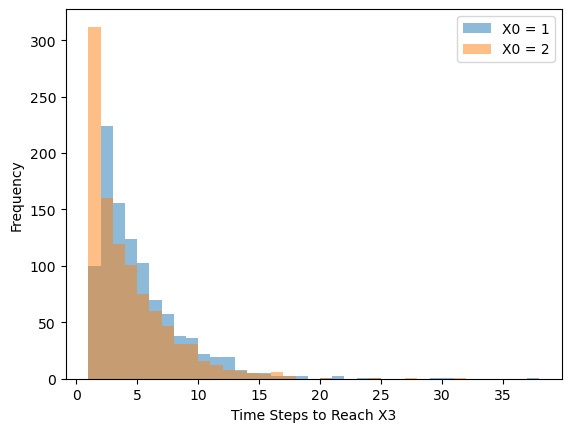

Mean Arrival Time (X0 = 1): 4.687
Mean Arrival Time (X0 = 2): 3.825


In [82]:
#3a
import numpy as np
import matplotlib.pyplot as plt
def simulate_markov_chain(starting_node, transition_matrix, absorbing_state):
    current_node = starting_node
    time_steps = 0

    while current_node != absorbing_state:
        probabilities = transition_matrix[current_node - 1]
        current_node = np.random.choice([1, 2, 3], p=probabilities)
        time_steps += 1

    return time_steps

# Number of simulations
num_simulations = 1000
# Absorbing state
absorbing_state = 3
# Run simulations for X0 = 1
arrival_times_1 = [simulate_markov_chain(1, P, absorbing_state) for _ in range(num_simulations)]
# Run simulations for X0 = 2
arrival_times_2 = [simulate_markov_chain(2, P, absorbing_state) for _ in range(num_simulations)]

# Plot histograms
plt.hist(arrival_times_1, bins=range(1, max(arrival_times_1) + 2), alpha=0.5, label='X0 = 1')
plt.hist(arrival_times_2, bins=range(1, max(arrival_times_2) + 2), alpha=0.5, label='X0 = 2')
plt.xlabel('Time Steps to Reach X3')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Compute the mean arrival time
mean_arrival_time_1 = np.mean(arrival_times_1)
mean_arrival_time_2 = np.mean(arrival_times_2)
print("Mean Arrival Time (X0 = 1):", mean_arrival_time_1)
print("Mean Arrival Time (X0 = 2):", mean_arrival_time_2)
